In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [78]:
import pandas as pd
import numpy as np
import io

#데이터 불러오기
df = pd.read_csv(io.BytesIO(uploaded['vgames2.csv']))
df = df.dropna(axis=0)
df['Year'] = df['Year'].astype(int)

#중복된 게임명 제거
df = df.drop_duplicates(['Name'])
df.iloc[:12]
df.shape

(11410, 9)

In [79]:
#Sales 데이터의 단위는 Million, 따라서 K, M 지우고 단위 변환

df.NA_Sales = (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
 
df.EU_Sales = (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
 
df.JP_Sales = (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
df.Other_Sales = (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))



In [7]:
df = df[df['Year'] > 1000]
df

,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Maze Craze: A Game of Cops 'n Robbers,Atari,2600,1980,Action,0.42,0.02,0.0,0.00
1,Sabre Wulf,THQ,GBA,1984,Platform,0.02,0.01,0.0,0.00
2,The Golden Compass,Sega,PSP,2007,Action,0.11,0.00,0.0,0.10
3,Alone in the Dark: The New Nightmare,Infogrames,PS,2001,Adventure,0.09,0.06,0.0,0.01
4,Disney's Cinderella: Magical Dreams,Disney Interactive Studios,GBA,2006,Platform,0.10,0.04,0.0,0.00
...,...,...,...,...,...,...,...,...,...
16488,Custer's Revenge,Mystique,2600,1981,Action,0.76,0.05,0.0,0.01
16490,Kaboom!,Activision,2600,1980,Misc,1.07,0.07,0.0,0.01
16491,Checkers,Atari,2600,1980,Misc,0.22,0.01,0.0,0.00
16492,Bridge,Activision,2600,1980,Misc,0.25,0.02,0.0,0.00


In [ ]:
#연도 오류 수정
error = df[df['Year'] <1000]
list_of_my_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
error['Total_Sales'] = error[list_of_my_columns].sum(axis=1)
error = error[error['Total_Sales'] > 0.5]
error.sort_values('Total_Sales', ascending=False)

,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales


In [81]:
num = df.Year

while num < 25:
  num = num+2000

while num < 1000:
  num = num+1900

ValueError: ignored

1 지역에 따라서 선호하는 게임 장르가 다를까?

In [8]:
#1 지역에 따라서 선호하는 게임 장르가 다를까?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

Text(0, 0.5, 'Genre')

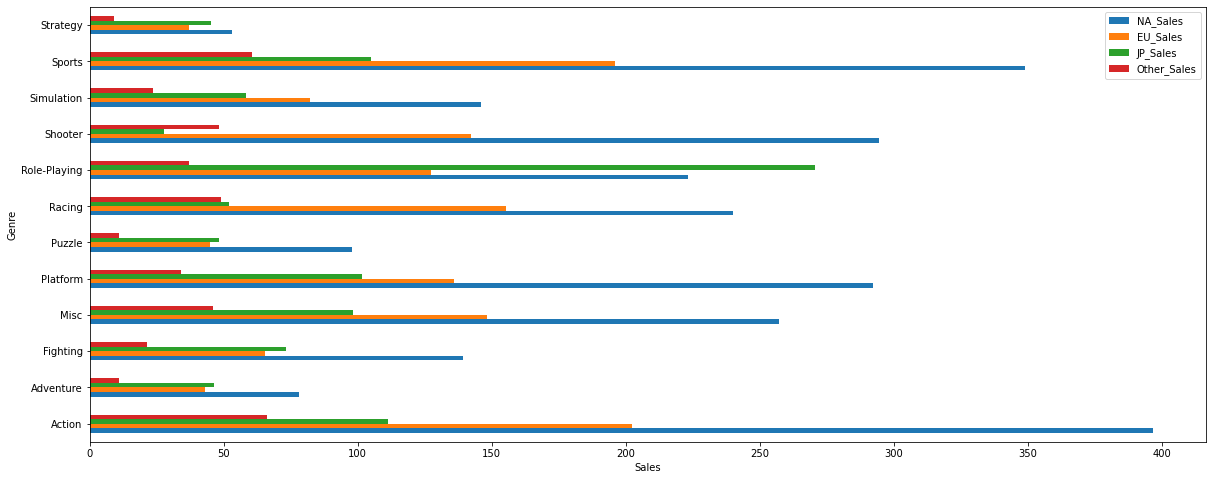

In [11]:
#지역별 장르 선호도
df1 = df.drop(['Year'], axis=1)
df1.groupby("Genre").sum()

plt.rcParams["figure.figsize"] = (20,8)
compare_plot = df1.groupby("Genre").sum().plot(kind='barh')
compare_plot.set_xlabel("Sales")
compare_plot.set_ylabel("Genre")

In [12]:
#지역별 장르 평균 매출 
NA_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['NA_Sales'].mean())
EU_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['EU_Sales'].mean())
JP_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['JP_Sales'].mean())
Other_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['Other_Sales'].mean())
Sales_Mean = pd.DataFrame([NA_Sales_Mean, EU_Sales_Mean, JP_Sales_Mean, Other_Sales_Mean])
Sales_Mean = Sales_Mean.T
Sales_Mean

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.208360,0.106327,0.058392,0.034761
Adventure,0.075266,0.041681,0.044667,0.010560
Fighting,0.230132,0.108000,0.121074,0.035074
Misc,0.199078,0.114864,0.076042,0.035693
Platform,0.501115,0.232813,0.173945,0.058216
Puzzle,0.200861,0.091598,0.099078,0.022213
Racing,0.313238,0.202937,0.067937,0.063930
Role-Playing,0.184599,0.105401,0.223681,0.030778
Shooter,0.363333,0.175481,0.034247,0.059605


Text(0, 0.5, 'Genre')

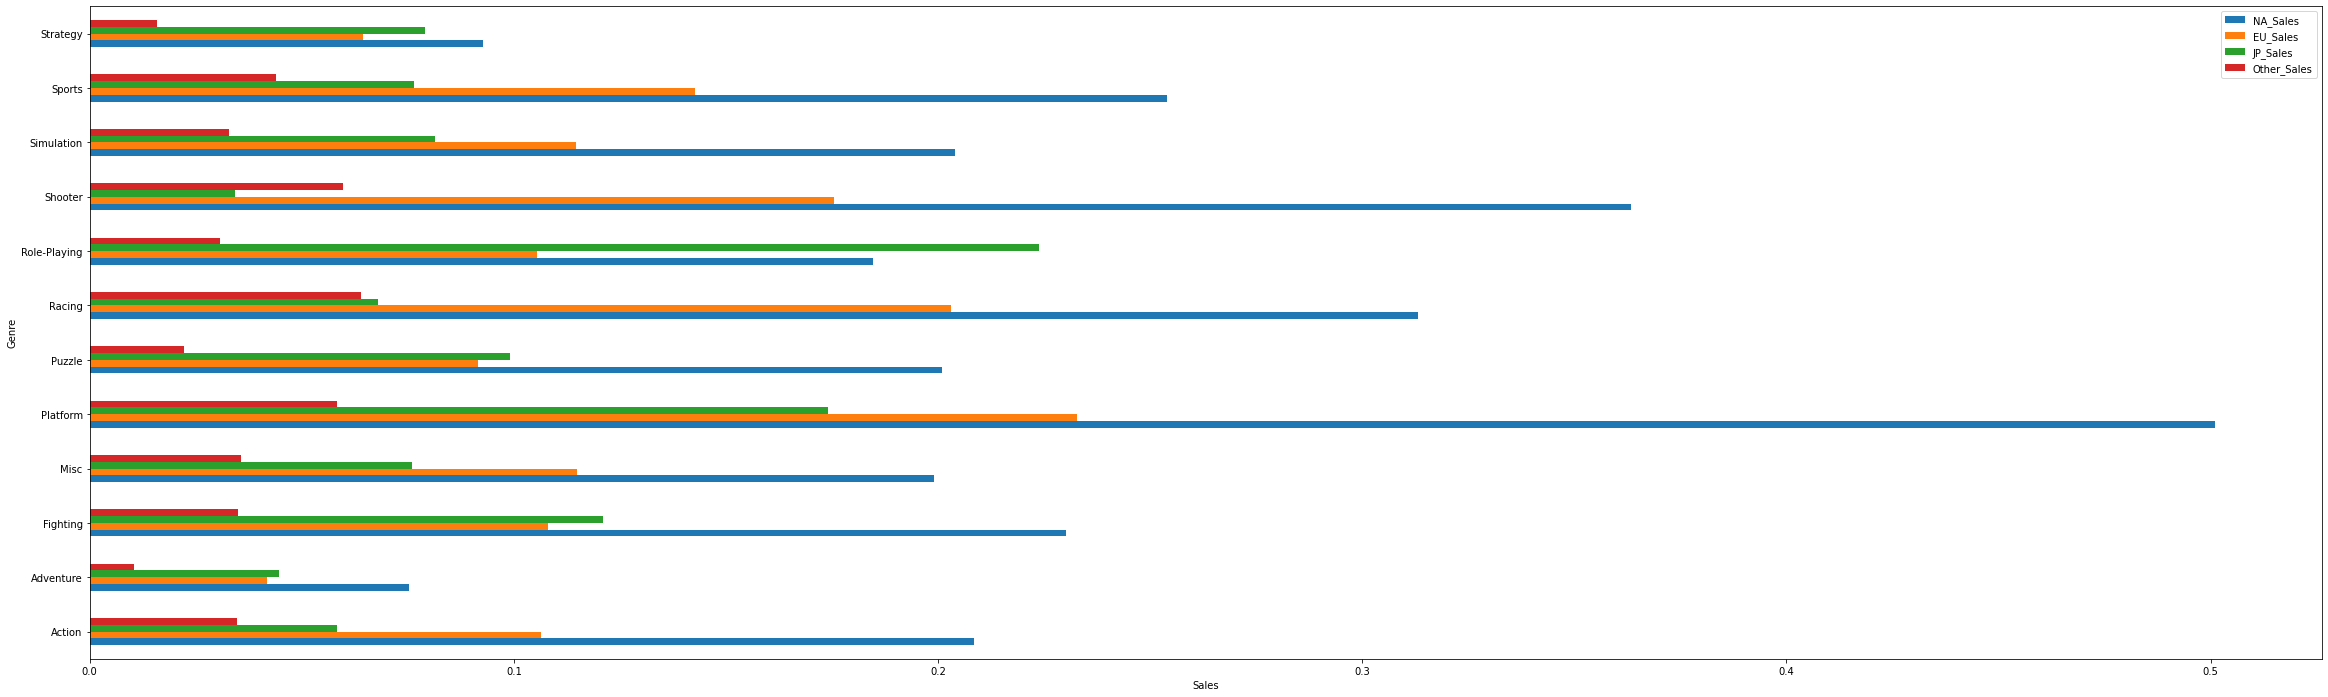

In [ ]:
#시각화 그래프 사이즈 조정
plt.rcParams["figure.figsize"] = (40,12)

#Sales 전체 평균 그래프
compare_plot = Sales_Mean.plot(kind='barh')
compare_plot.set_xlabel("Sales")
compare_plot.set_ylabel("Genre")

2. 연도별 게임(장르)의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

In [17]:
df2 = df.copy()
list_of_my_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df2['Total_Sales'] = df[list_of_my_columns].sum(axis=1)
df2['Year'] = df2['Year'].astype(int)
df2.head()

,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Maze Craze: A Game of Cops 'n Robbers,Atari,2600,1980,Action,0.42,0.02,0.0,0.00,0.44
1,Sabre Wulf,THQ,GBA,1984,Platform,0.02,0.01,0.0,0.00,0.03
2,The Golden Compass,Sega,PSP,2007,Action,0.11,0.00,0.0,0.10,0.21
3,Alone in the Dark: The New Nightmare,Infogrames,PS,2001,Adventure,0.09,0.06,0.0,0.01,0.16
4,Disney's Cinderella: Magical Dreams,Disney Interactive Studios,GBA,2006,Platform,0.10,0.04,0.0,0.00,0.14


In [18]:
cross_df2 = pd.crosstab(df2.Genre, df2.Year)
cross_df = cross_df2.T
cross_df['Top'] = cross_df.idxmax(axis=1)
cross_df['Count'] = cross_df.max(axis=1)
cross_df = cross_df.reset_index()
cross_df.head()

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Top,Count
0,1977,1,0,0,0,0,0,1,0,1,0,0,0,Action,1
1,1978,1,0,0,0,0,2,0,0,1,0,1,0,Puzzle,2
2,1979,1,0,0,0,0,0,0,0,0,0,0,0,Action,1
3,1980,3,1,0,3,0,0,1,0,0,0,1,0,Action,3
4,1981,23,0,0,0,2,2,1,0,9,1,4,0,Action,23


In [19]:
from scipy.stats import chi2_contingency

obs = pd.crosstab(cross_df['Year'],cross_df['Count'])
print(chi2_contingency(obs, correction = False))
print(chi2_contingency(obs, correction = True))

#귀무가설 : Year & 연도별 Top 장르가 연관이 없다
#대립가설 : Year & 연도별 Top 장르가 연관이 없다
#신뢰구간 : 95%
#pvalue: 0.272로 귀무가설 채택 연관이 없다

(1290.0, 0.27219402721854785, 1260, array([[0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       ...,
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581]]))
(1290.0, 0.27219402721854785, 1260, array([[0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325581, 0.02325581,
        0.02325581],
       ...,
       [0.11627907, 0.02325581, 0.09302326, ..., 0.02325

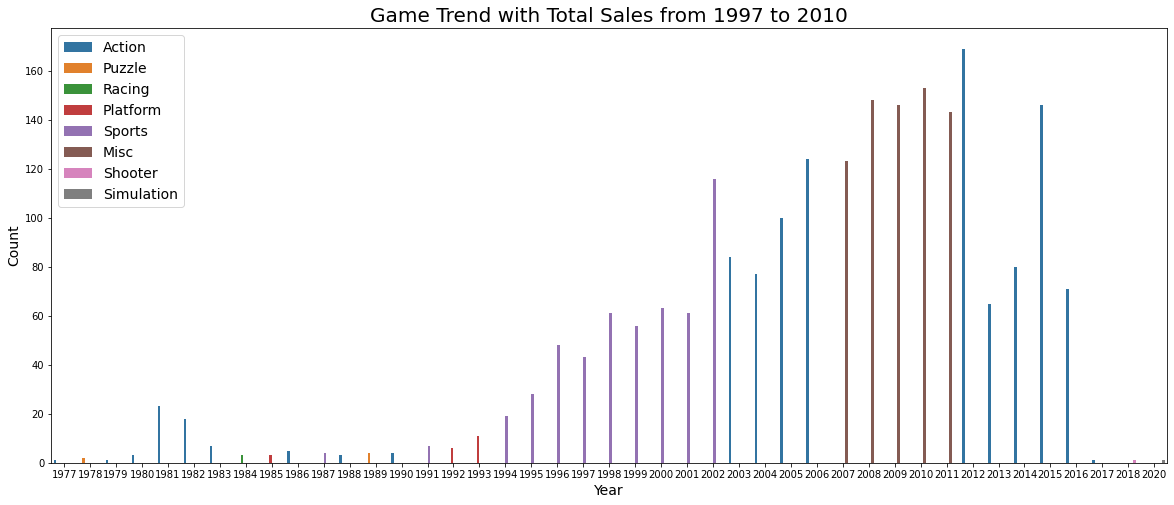

In [21]:
#연도별 출고량에 따른 게임 트렌드
import seaborn as sns
ax = sns.barplot(x='Year', 

                  y='Count', 

                  hue='Top',

                  data=cross_df)

plt.title('Game Trend with Total Sales from 1997 to 2010', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=14, loc='best')
plt.show()


3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

Text(0, 0.5, 'Sales')

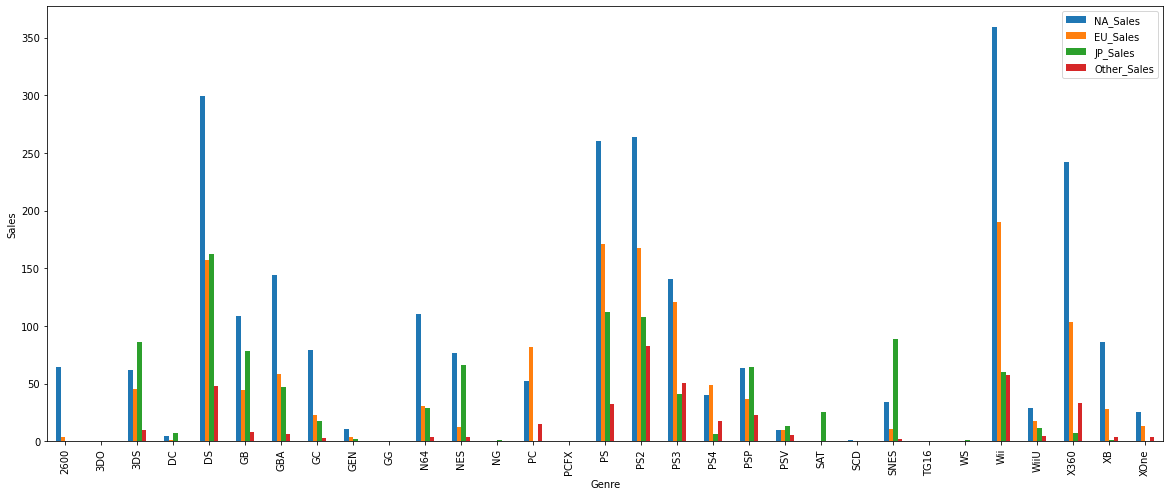

In [22]:
#3.1 플랫폼별 국가 출고량
df3 = df2.drop(['Year', 'Total_Sales'], axis=1)
df3 = df3.groupby("Platform").sum()
year_plot = df3.plot(kind='bar')
year_plot.set_xlabel("Genre")
year_plot.set_ylabel("Sales")

In [31]:
#3.2 플랫폼별 게임 출고량
df3 = df2[['Platform', 'Total_Sales']]
df3 = df3.groupby("Platform").sum()
df3.head()


,Total_Sales
Platform,
2600,68.40
3DO,0.10
3DS,203.30
DC,13.09
DS,666.52


Text(0, 0.5, 'Sales')

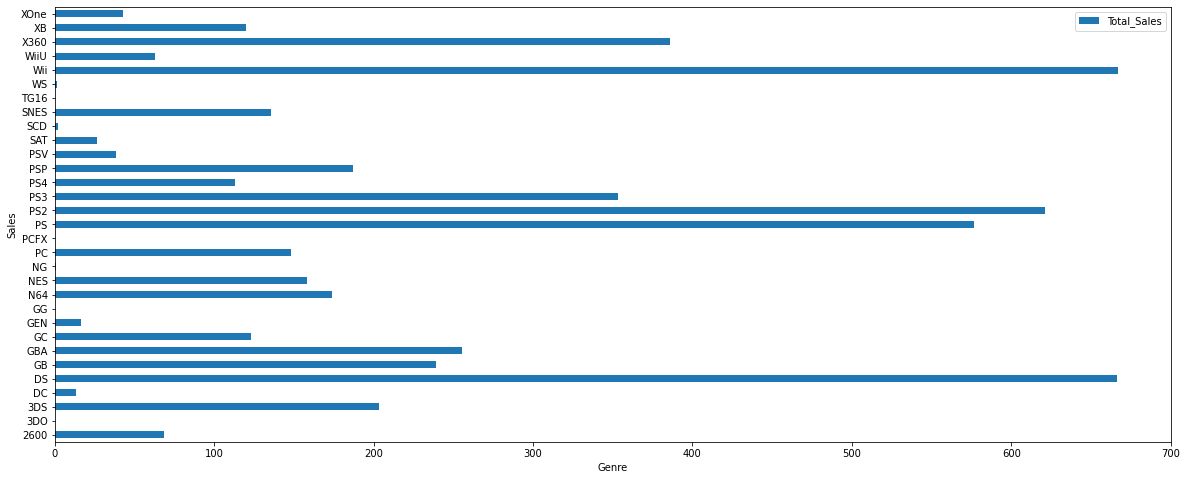

In [32]:
year_plot = df3.plot(kind='barh')
year_plot.set_xlabel("Genre")
year_plot.set_ylabel("Sales")

In [105]:
#3.3 게임별 출고량
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_sort = df2.sort_values(['Total_Sales'], ascending=False)
df_sort.iloc[:100]

,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9585,Wii Sports,Nintendo,Wii,2006,Sports,41.49,29.02,3.77,8.46,82.74
7868,Mario Kart Wii,Nintendo,Wii,2008,Racing,15.85,12.88,3.79,3.31,35.83
5657,Wii Sports Resort,Nintendo,Wii,2009,Sports,15.75,11.01,3.28,2.96,33.00
15655,Pokemon Red/Pokemon Blue,Nintendo,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38
16295,Tetris,Nintendo,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...,...,...,...
7161,Monster Hunter Freedom Unite,Capcom,PSP,2008,Role-Playing,0.47,0.57,4.13,0.34,5.51
13742,Super Mario Advance,Nintendo,GBA,2001,Platform,3.14,1.24,0.91,0.20,5.49
14169,Mario Kart: Super Circuit,Nintendo,GBA,2001,Racing,2.62,1.64,0.99,0.23,5.48
14132,Super Mario World,Nintendo,GBA,2001,Platform,3.21,1.11,0.95,0.20,5.47


In [103]:
######## 개인 추가 코드

df1_sort = df2.drop((['Total_Sales']), axis =1)
#Label로 지정
publisher_label = df1_sort['Publisher']
platform_label = df1_sort['Platform']
genre_label = df1_sort['Genre']

#숫자 데이터
number = df1_sort[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

#정규화
scaler = StandardScaler()
scaler.fit(number)
number = scaler.transform(number)
number


array([[ 0.23660464, -0.19605985, -0.27746015, -0.22029537],
       [-0.25136006, -0.21537173, -0.27746015, -0.22029537],
       [-0.141568  , -0.23468361, -0.27746015,  0.38011595],
       ...,
       [-0.00737771, -0.21537173, -0.27746015, -0.22029537],
       [ 0.02921964, -0.19605985, -0.27746015, -0.22029537],
       [ 0.11461346, -0.19605985, -0.27746015, -0.22029537]])

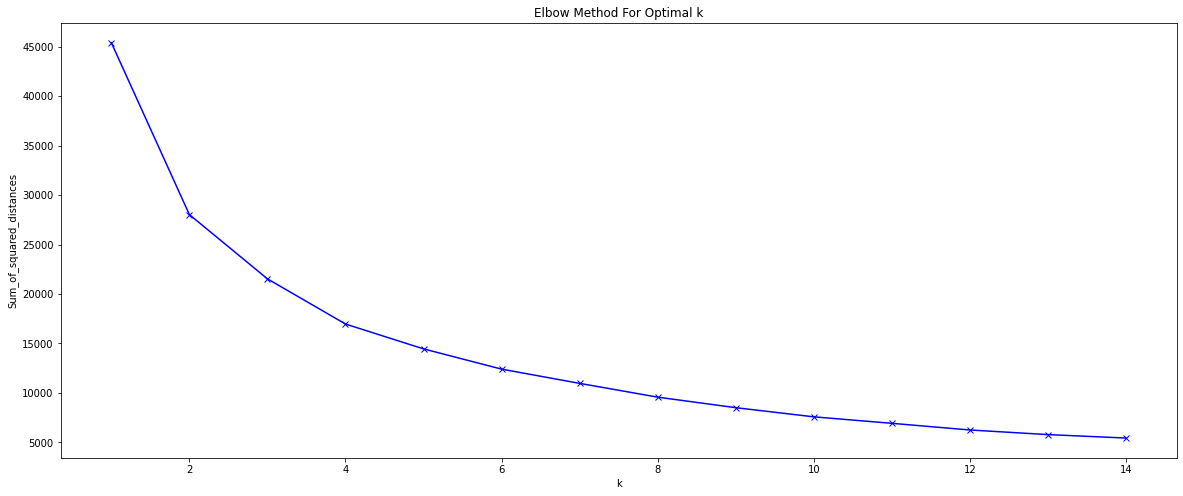

In [104]:
#Elbow methods
sum_of_sqd = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(number)
    sum_of_sqd.append(km.inertia_)

plt.plot(K, sum_of_sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [85]:
k2_means = KMeans(n_clusters=2, random_state=42)
k2_means.fit(number)
clusters = k2_means.labels_
series = pd.Series(clusters)
series

0     0
1     0
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    1
29    0
30    0
dtype: int32

In [86]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(number)
final_df = pd.DataFrame(data = pc, columns = ['PC1','PC2'])
final_df['Cluster'] = series
final_df

,PC1,PC2,Cluster
0,-1.135456,-0.291980,0
1,-1.520458,-0.161215,0
2,0.350400,1.209982,0
3,-1.407579,-0.022066,0
4,4.351815,1.321377,1
5,0.452804,1.001233,0
6,0.413142,0.236805,0
7,-0.631886,-0.062393,0
8,-1.401224,-0.161264,0
9,-1.521071,-0.162485,0


In [90]:
label_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
label_df['Publisher'] = pd.Series(publisher_label)
label_df

,PC1,PC2,Publisher
0,-1.135456,-0.291980,Atari
1,-1.520458,-0.161215,THQ
2,0.350400,1.209982,Sega
3,-1.407579,-0.022066,Infogrames
4,4.351815,1.321377,Disney Interactive Studios
5,0.452804,1.001233,NaN
6,0.413142,0.236805,Nintendo
7,-0.631886,-0.062393,Unknown
8,-1.401224,-0.161264,Empire Interactive
9,-1.521071,-0.162485,Unknown


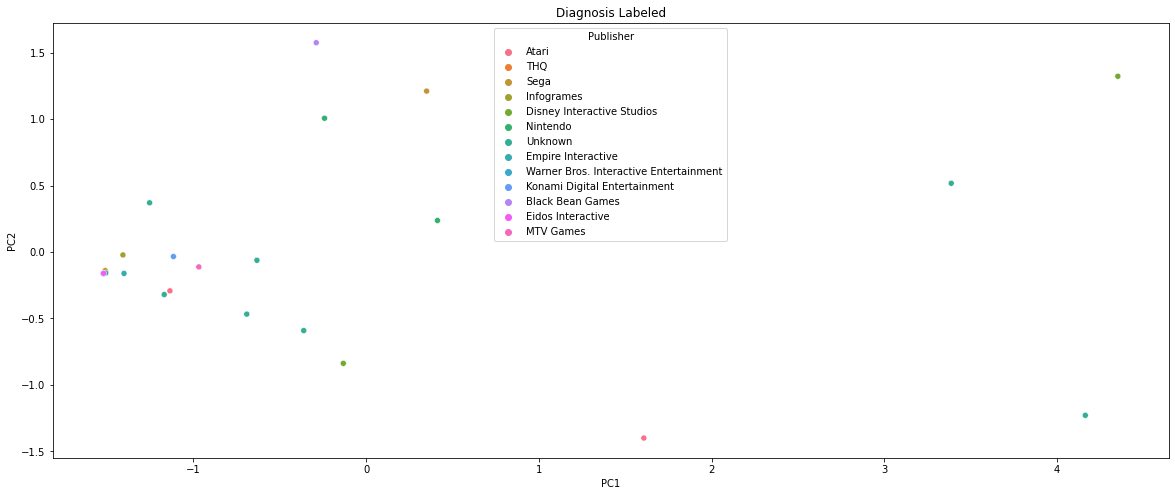

In [91]:
sns.scatterplot(data = label_df ,x='PC1',y='PC2', hue='Publisher')
plt.title('Diagnosis Labeled')
plt.show()